In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [147]:
df=pd.read_csv(r"C:\Users\Shanu\Desktop\Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [148]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [150]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [151]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [152]:
# Impute missing Age values with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Drop Cabin column
col_to_drop = ['Cabin','PassengerId','Ticket','Name']
df.drop(col_to_drop, axis=1, inplace=True)

# Fill missing Embarked values with the most common value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [153]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Data Visualization Analysis

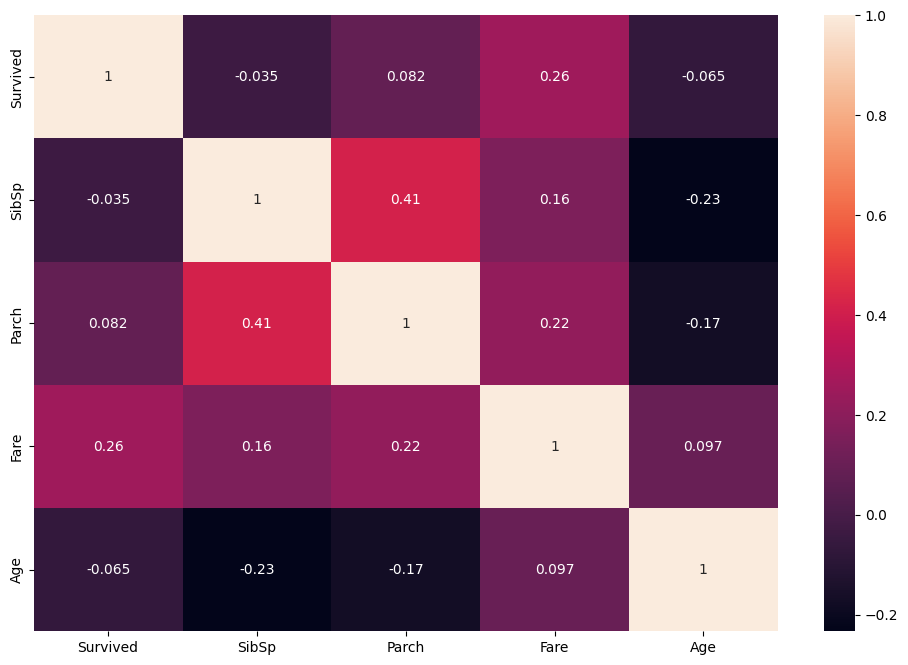

In [154]:
plt.figure(figsize=(12,8))
heatmap = sns.heatmap(df[['Survived','SibSp','Parch','Fare','Age']].corr(), annot= True)

In [155]:
df['SibSp'].nunique()

7

In [156]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

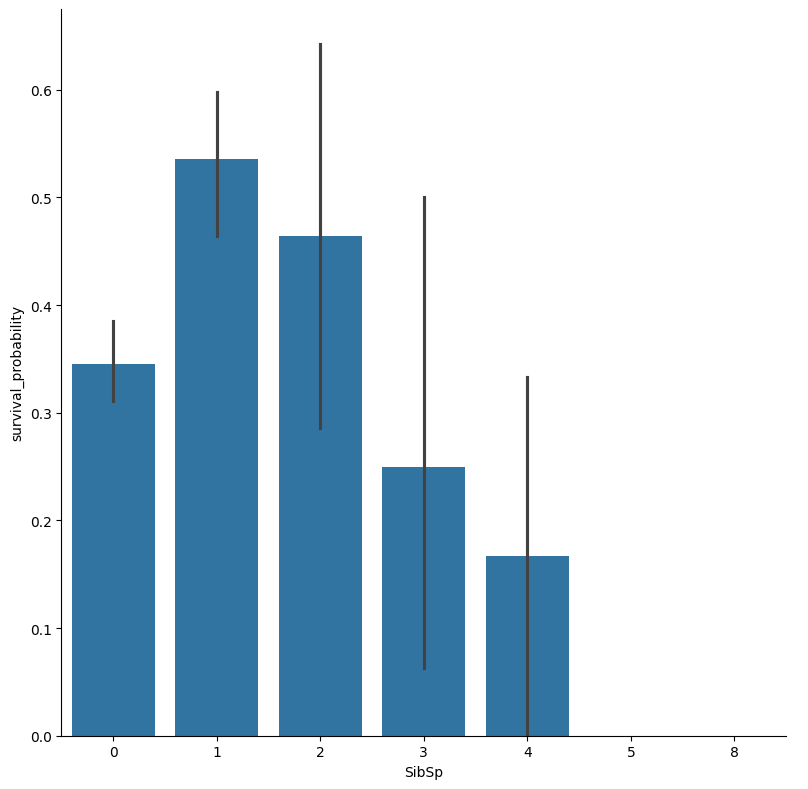

In [157]:
sns.catplot(x='SibSp', y='Survived', data=df, kind='bar', height=8).set_ylabels('survival_probability')

In [158]:
df.duplicated().sum()

np.int64(116)

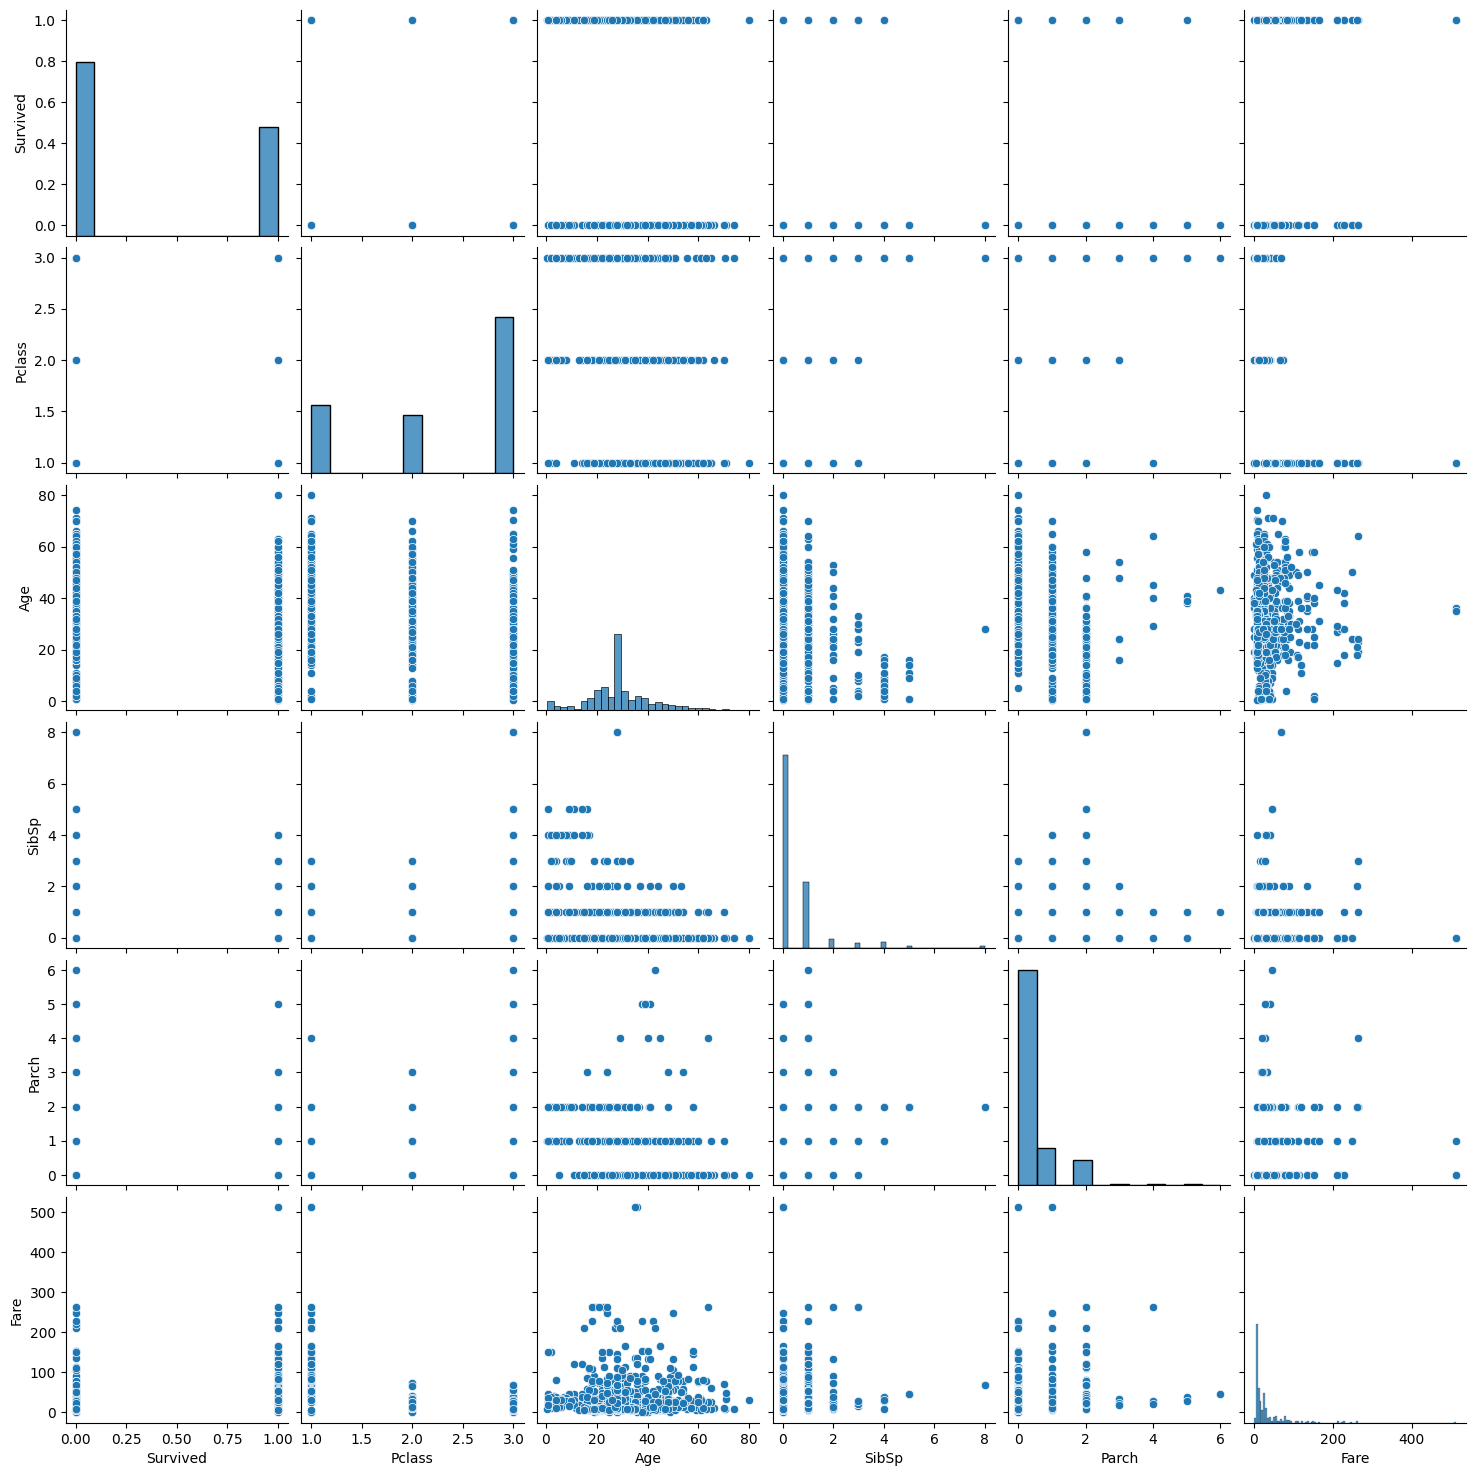

In [159]:
#Data Visualization
import seaborn as sns
sns.pairplot(df)

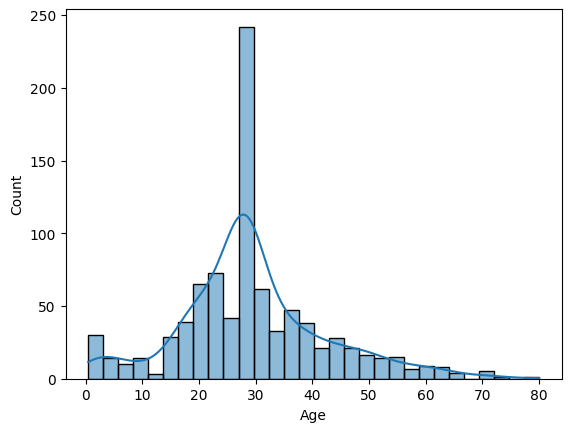

In [163]:
#Check the distribution of each column
sns.histplot(df['Age'], kde=True)  # Plot the distribution of a numerical column
plt.show()

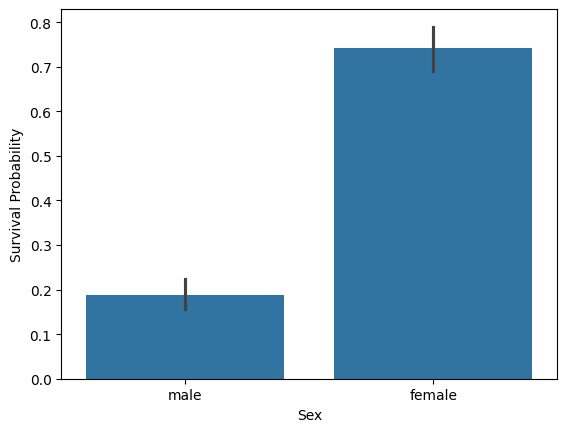

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the barplot
sns.barplot(x='Sex', y='Survived', data=df)

# Set the y-label
plt.ylabel('Survival Probability')

# Show the plot
plt.show()


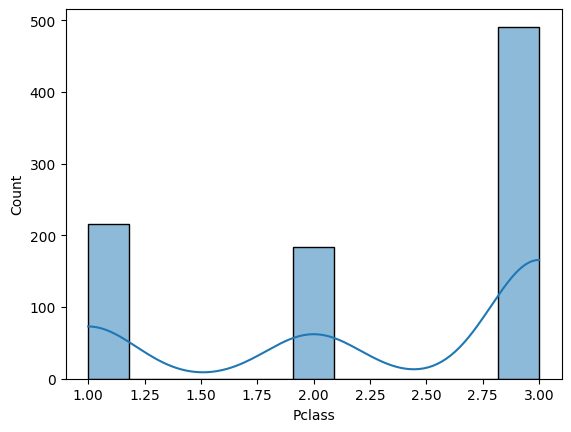

In [165]:
# Distribution of Pclass 
sns.histplot(df['Pclass'], kde=True)  
plt.show()

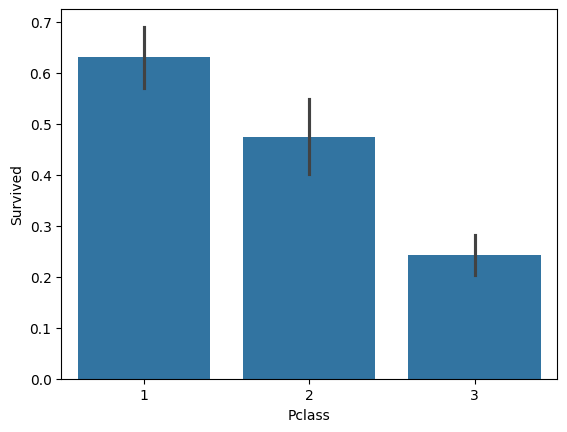

In [166]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.show()

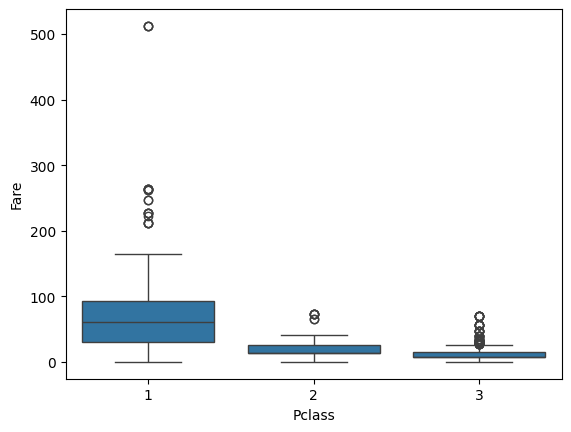

In [167]:
#Check for outliers or extreme values
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.show()

### Numerical Encoding

In [168]:
Genders = {'male':0,'female':1}
df['Sex']=df['Sex'].map(Genders)

In [169]:
Ports = {'S':0, 'C':1, 'Q':2}
df['Embarked']=df['Embarked'].map(Ports)

### Splitting the data and Scaling

In [170]:
x = df.drop(df.columns[[0]], axis=1)
y=df['Survived']

In [171]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.30,random_state=0)

In [172]:
sc_x=StandardScaler()
xtrain=sc_x.fit_transform(xtrain)
xtext=sc_x.fit_transform(xtest)

### Classification 

In [173]:
svc_classifier = SVC()
svc_classifier.fit(xtrain, ytrain)

SVC()

In [174]:
svc_classifier_ypred=svc_classifier.predict(xtest)

C:\Users\Shanu\anaconda3\envs\notebook\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [175]:

svc_classifier_acc=accuracy_score(ytest, svc_classifier_ypred)

In [176]:

print('Support Vector: ', round(svc_classifier_acc*100,2))

Support Vector:  62.69


In [177]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(xtrain, ytrain)

LogisticRegression()

In [178]:
ypred=lg.predict(xtest)
ypred

C:\Users\Shanu\anaconda3\envs\notebook\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [179]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(ypred,ytest)
accuracy

0.6380597014925373

In [180]:
acu=accuracy_score(lg.predict(xtrain),ytrain)
acu

0.7961476725521669

### Model Evaluation

In [181]:
from sklearn.metrics import classification_report

# Assuming ytest and ypred are already defined
print('Classification Report:-------------------\n', classification_report(ytest, ypred))


Classification Report:-------------------
               precision    recall  f1-score   support

           0       0.63      0.99      0.77       168
           1       0.80      0.04      0.08       100

    accuracy                           0.64       268
   macro avg       0.72      0.52      0.43       268
weighted avg       0.70      0.64      0.51       268



### Key Insights

#### Data Preparation

##### The missing values in Columns such as Age, Cabin and Embarked were handled with processes like Imputation and Exclusion.

#### Data Analysis

##### Female passengers had a higher rate of Survival
##### Passengers on First Class had a higher survivval possibilty compared to that on sec and third, sec had a greater one than third.

#### Model Performance
##### The build model predicts the survival rate with an accuracy of 64% only.
